In [ ]:
# Group: Equity 
# Task: Kalman Filter
# Names: Richa Bhatia (Contribution: 33%) 
#        Neel Indap (Contribution: 33%)
#        Fangning He (Contribution: 33%)

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [92]:
file = pd.read_csv("AMZN_lec2.csv");
df = pd.DataFrame(file)
df_Close_normalization = (df['Close']-df['Close'].min())/(df['Close'].max()-df['Close'].min())
dt= df['Date']
df_min = df['Close'].min()
df_max = df['Close'].max()

In [94]:
print(df_Close_normalization.describe())
print("variance: ",df_Close_normalization.var())

count    585.000000
mean       0.383598
std        0.234138
min        0.000000
25%        0.230379
50%        0.320767
75%        0.458113
max        1.000000
Name: Close, dtype: float64
variance:  0.05482072796650631


In [95]:
kf=[]
def Kalmanfilter(Close):
    variance = 0.0548

    Z = 1;
    T = 0.5;
    H = variance;
    Q = 0.5*variance;

    S_length = len(Close)
    #S = S_length + 1
    S = S_length
    uhat = [0 for x in range(S)]
    phat = [0 for x in range(S)]

    # Initial Vales
    u_predict = 1
    u_update = 0
    p_predict = 1
    p_update = 1000


    for i in range(0, S):
        #p_update = 1000
        uhat[i] = u_predict
        phat[i] = p_predict
        F = np.square(Z)*p_predict+H
        u_update = u_predict+p_predict*Z/F
        u_predict = T*u_update
        p_update = p_predict-p_predict*np.square(Z)/F*p_predict
        p_predict = np.square(T)*p_update+Q
        kf.append(p_predict)


    final_predict = Z*u_predict
    return final_predict, uhat, phat


In [96]:
final_predict,uhat,phat = Kalmanfilter(df_Close_normalization)
print(len(kf))
final_predict

585


0.3722813232690143

In [98]:

final_predict_real = (final_predict * (df_max - df_min)) + df_min
print("Final Predicted Value: ",final_predict_real) 

Final Predicted Value:  906.1670205870622


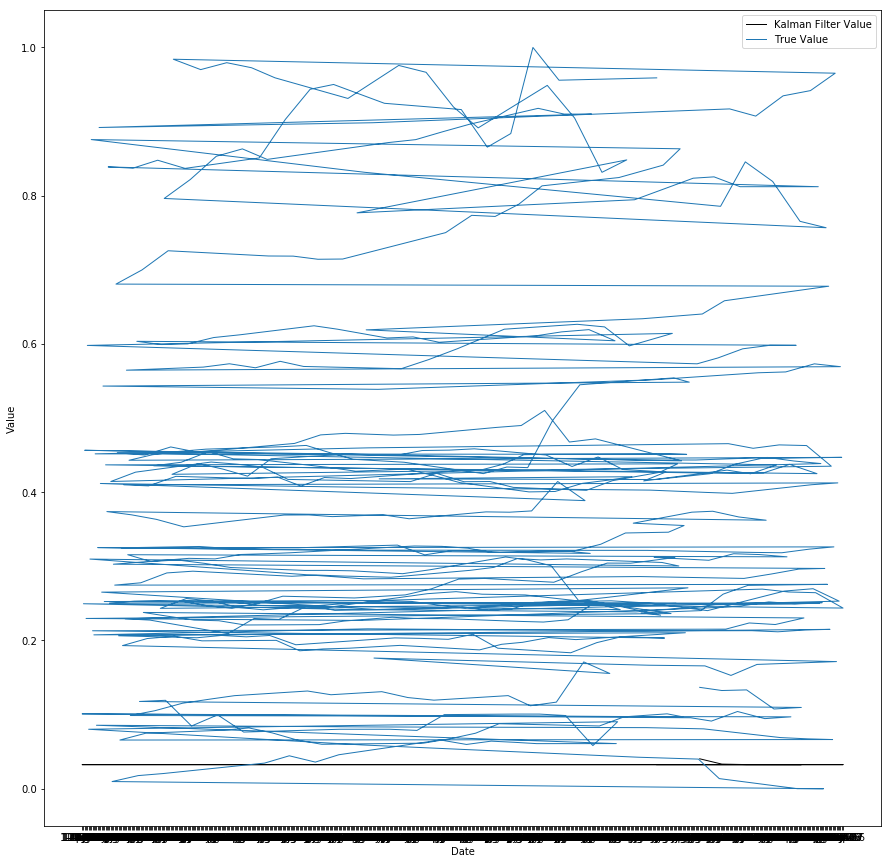

In [99]:
plt.plot(dt,kf,color='black', lw='1',label='Kalman Filter Value')
plt.plot(dt,df_Close_normalization,lw='1',label='True Value') 
plt.legend(loc=1)
plt.xlabel('Date')
plt.ylabel('Value')
plt.rcParams['figure.figsize'] = (15, 15)